In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import numpy as np
import glob
import sys

In [2]:
def plot():
    """This function is used to plot the gaussians, with respect to the arguments given, the data to plot gaussian is saved in
    results folder.  
    """
    matching_files = sorted(glob.glob(f"results/matching_{'' if scores_type is None else scores_type+'_'}scores*.npy"))
    non_matching_files = sorted(glob.glob(f"results/non_matching_{'' if scores_type is None else scores_type+'_'}scores*.npy"))
    assert len(matching_files) == len(non_matching_files)
    versions = (
        "Taking absolute values",
        "Taking only positive values",
        "Replacing negative with small values (near zero)",
        "Normalizing between 0 and 1"
    )
    fig, ax = plt.subplots(len(matching_files), figsize=(14, 5 * len(matching_files)))
    for i in range(len(matching_files)):
        matching_scores = np.load(matching_files[i])
        non_matching_scores = np.load(non_matching_files[i])
        m_mean, m_std = norm.fit(matching_scores)
        nm_mean, nm_std = norm.fit(non_matching_scores)
        m_x = np.linspace(matching_scores.min(), matching_scores.max(), 1000)
        nm_x = np.linspace(non_matching_scores.min(), non_matching_scores.max(), 1000)
        m_pdf = norm.pdf(m_x, m_mean, m_std)
        nm_pdf = norm.pdf(nm_x, nm_mean, nm_std)
        plt.plot(m_x, m_pdf, nm_x, nm_pdf)
        plt.legend(["matching", "non_matching"])
    plt.savefig("results/gaussians_fit.png")
    plt.show()

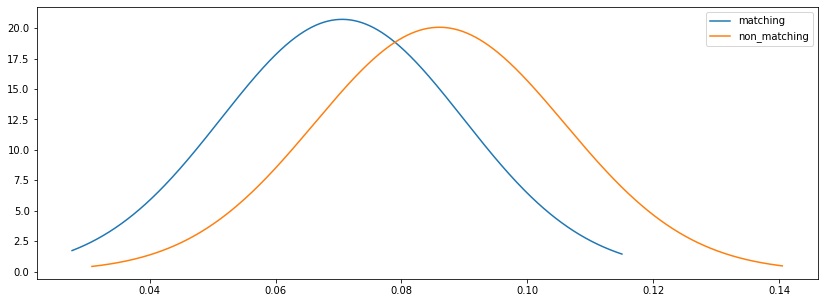

In [3]:
scores_type = None
plot()

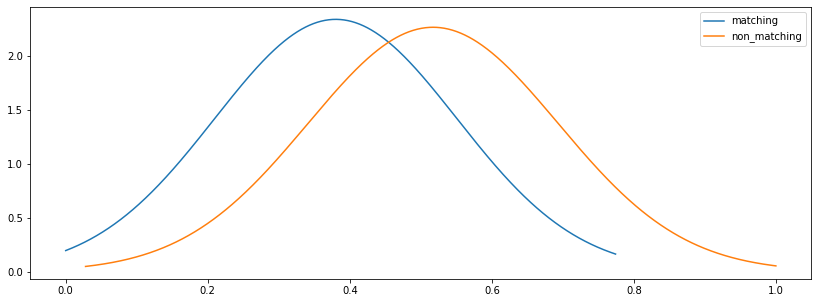

In [4]:
scores_type = 'normalized'
plot()

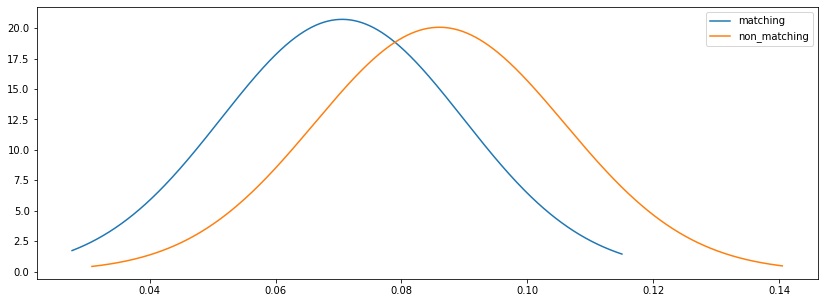

In [5]:
scores_type = 'clipped'
plot()

# Results

| |  Intelligibility |  Phoneme Quality |  Mispronunciation |  Stress |  Intonation |  Pause Placement |  MTI | 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
| %|  0.8837542945595953 |  0.7109525427568241 |  0.5534413108317288 |  0.39947898969305695 |  0.6277419111262128 |  0.8336542454789142 |  0.5474383659908635 | 
| Mean Threshold| 35.33816996516589| 35.33816996516589 | 35.33816996516589 | 35.33816996516589 | 35.33816996516589 | 35.33816996516589 | 35.33816996516589 | 
| Interaction Threshold| 36.577357873088154| 36.577357873088154 | 36.577357873088154 | 36.577357873088154 | 36.577357873088154 | 36.577357873088154 | 36.577357873088154 | 
| Mean Threshold Clipped| 35.1122791051345| 35.1122791051345 | 35.1122791051345 | 35.1122791051345 | 35.1122791051345 | 35.1122791051345 | 35.1122791051345 | 
| Interaction Threshold Clipped| 36.414601544799694| 36.414601544799694 | 36.414601544799694 | 36.414601544799694 | 36.414601544799694 | 36.414601544799694 | 36.414601544799694 | 
| Mean Threshold Normalised| 0.29640524421458575| 0.29640524421458575 | 0.29640524421458575 | 0.29640524421458575 | 0.29640524421458575 | 0.29640524421458575 | 0.29640524421458575 | 
| Interaction Threshold Normalised| 0.3109845663950828| 0.3109845663950828 | 0.3109845663950828 | 0.3109845663950828 | 0.3109845663950828 | 0.3109845663950828 | 0.3109845663950828 | 
| Accuracy Mean Threshold| 0.86368843069874| 0.7124856815578465 | 0.5647193585337915 | 0.4066437571592211 | 0.571919770773639 | 0.8304696449026345 | 0.520452230662335 | 
| Accuracy Interaction Threshold| 0.8642611683848798| 0.7130584192439863 | 0.56471936483929013 | 0.4066437571592211 | 0.571929985239010 | 0.8310423825887743 | 0.520585016897396 | 
| Accuracy Mean Threshold Version 2 (Absolute Value)| 0.8774341351660939 | 0.722794959908362 | 0.5715922107674685 | 0.41237113402061853 | 0.5619266055045872 | 0.845357873098154 | 0.557077502227953 | 
| Accuracy Interaction Version 2 (Absolute Value)| 0.8774341352350594 | 0.722794959908362 | 0.5715975240722274 | 0.41237143922591208 | 0.5616045845272206 | 0.845360824742268 | 0.557077502227953 | 
| Accuracy Mean Threshold Version 3 (Positive Values)| 0.8268348623853211 | 0.7138990825688073 | 0.5504587155963303 | 0.4094036697247706 | 0.5715922107674685 | 0.7993119266055047 | 0.556255776287344 | 
| Accuracy Interaction Version 3 (Positive Values)| 0.8269340974212034 | 0.7241547277936962 | 0.5507163323782235 | 0.4091690544412607 | 0.564523101674685 | 0.7994269340974212 | 0.556255776287344 | 
| Accuracy Mean Threshold Version 4 (Normalised Values)| 0.8188073394495413 | 0.681697247706422 | 0.5711009174311927 | 0.411697247706422 | 0.570446735395189 | 0.7925501432664757 | 0.525019015851980 | 
| Accuracy Interaction Threshold Version 4 (Normalised Values)| 0.8189111747851003 | 0.6820343839541547 | 0.5713467048710601 | 0.4120343839541547 | 0.5698739977090492 | 0.7924311926605505 | 0.525100908055805 | 

